# Text Message Analysis
***

## DATA Exploration

In [1]:
import pandas as pd

In [2]:
# Read Data
df = pd.read_csv('./clean_nus_sms.csv/clean_nus_sms.csv')
df = df.dropna()
df

,Unnamed: 0,id,Message,length,country,Date
0,0,10120,Bugis oso near wat...,21,SG,2003/4
1,1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4
2,2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4
3,3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4
4,4,10124,Meet after lunch la...,22,SG,2003/4
...,...,...,...,...,...,...
48593,55828,45712,Come to me AFTER NOON,21,Serbia,2015/3
48594,55830,45714,I LOVE YOU TOO,14,Serbia,2015/3
48595,55831,45715,C-YA,4,Serbia,2015/3
48596,55833,45717,BE MY GUEST,11,Serbia,2015/3


In [3]:
# Data head
df.head()

,Unnamed: 0,id,Message,length,country,Date
0,0,10120,Bugis oso near wat...,21,SG,2003/4
1,1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4
2,2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4
3,3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4
4,4,10124,Meet after lunch la...,22,SG,2003/4


In [4]:
# Data Description
df.describe()

,Unnamed: 0,id
count,48595.000000,48595.000000
mean,27139.121844,21106.134088
std,16205.445582,12189.190416
min,0.000000,1.000000
25%,12853.500000,12099.500000
50%,26917.000000,18553.000000
75%,40080.000000,29964.000000
max,55834.000000,45718.000000


## Data Analysis 
***
After exploring our data, we'll proceed on analysing it.

One of the most interesting topics is : Sentiment analysis, and Common topics users text about.

## NLP MODEL 
***
For the sentiment analysis, I'll use : Naive Bayes Classification. 

For the Common topics analysis, I'll use : TF-idf

In [5]:
# Libraries
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
import re, nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [7]:
df['Message_clean']=df['Message'].str.lower()
df['Message_clean']=df['Message_clean'].str.replace('[^\w\s]','')
df['Message_clean'] = df['Message_clean'].astype(str)
df

/tmp/ipykernel_203864/3153079328.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Message_clean']=df['Message_clean'].str.replace('[^\w\s]','')


,Unnamed: 0,id,Message,length,country,Date,Message_clean
0,0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat
1,1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,go until jurong point crazy available only in ...
2,2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when lets go learn pilates
3,3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price haiz cant ...
4,4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la
...,...,...,...,...,...,...,...
48593,55828,45712,Come to me AFTER NOON,21,Serbia,2015/3,come to me after noon
48594,55830,45714,I LOVE YOU TOO,14,Serbia,2015/3,i love you too
48595,55831,45715,C-YA,4,Serbia,2015/3,cya
48596,55833,45717,BE MY GUEST,11,Serbia,2015/3,be my guest


In [8]:
# Remove URLS
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
# Text Pre-processing 
def remove_punctuation(text):
	cleaned_text = ''.join(char for char in text if char.isalnum() or char.isspace())
	return cleaned_text

def remove_special_characters(text):
	cleaned_text = ''.join(char for char in text if char.isalnum() or char.isspace())
	return cleaned_text
# Remove HTML from Message data
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

df["Message_clean"] = df["Message_clean"].apply(lambda text: remove_html(text))
df['Message_clean']=df['Message_clean'].apply(lambda text:remove_urls(text))
df['Message_clean']=df['Message_clean'].apply(lambda text:remove_punctuation(text))
df['Message_clean']=df['Message_clean'].apply(lambda text:remove_special_characters(text))
df

,Unnamed: 0,id,Message,length,country,Date,Message_clean
0,0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat
1,1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,go until jurong point crazy available only in ...
2,2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when lets go learn pilates
3,3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price haiz cant ...
4,4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la
...,...,...,...,...,...,...,...
48593,55828,45712,Come to me AFTER NOON,21,Serbia,2015/3,come to me after noon
48594,55830,45714,I LOVE YOU TOO,14,Serbia,2015/3,i love you too
48595,55831,45715,C-YA,4,Serbia,2015/3,cya
48596,55833,45717,BE MY GUEST,11,Serbia,2015/3,be my guest


# Tokenization
***

In [9]:
nltk.download('punkt')
df['Message_tokenized'] = df.apply(lambda x: nltk.word_tokenize(x['Message_clean']), axis=1)
df

[nltk_data] Downloading package punkt to /home/j/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Unnamed: 0,id,Message,length,country,Date,Message_clean,Message_tokenized
0,0,10120,Bugis oso near wat...,21,SG,2003/4,bugis oso near wat,"[bugis, oso, near, wat]"
1,1,10121,"Go until jurong point, crazy.. Available only ...",111,SG,2003/4,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
2,2,10122,I dunno until when... Lets go learn pilates...,46,SG,2003/4,i dunno until when lets go learn pilates,"[i, dunno, until, when, lets, go, learn, pilates]"
3,3,10123,Den only weekdays got special price... Haiz......,140,SG,2003/4,den only weekdays got special price haiz cant ...,"[den, only, weekdays, got, special, price, hai..."
4,4,10124,Meet after lunch la...,22,SG,2003/4,meet after lunch la,"[meet, after, lunch, la]"
...,...,...,...,...,...,...,...,...
48593,55828,45712,Come to me AFTER NOON,21,Serbia,2015/3,come to me after noon,"[come, to, me, after, noon]"
48594,55830,45714,I LOVE YOU TOO,14,Serbia,2015/3,i love you too,"[i, love, you, too]"
48595,55831,45715,C-YA,4,Serbia,2015/3,cya,[cya]
48596,55833,45717,BE MY GUEST,11,Serbia,2015/3,be my guest,"[be, my, guest]"


# Data Analysis
***

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Correct values
df = df.replace({'country':{'SG':'Singapore', 
                            'USA':'United States',
                            'india':'India',
                            'INDIA':'India',
                            'srilanka':'Sri Lanka',
                            'UK':'United Kingdom',
                            'BARBADOS':'Barbados',
                            'jamaica':'Jamaica',
                            'MY':'Malaysia',
                            'unknown':'Unknown'}})
#count the real number of unique countries
df['country'].nunique()

33

<AxesSubplot:>

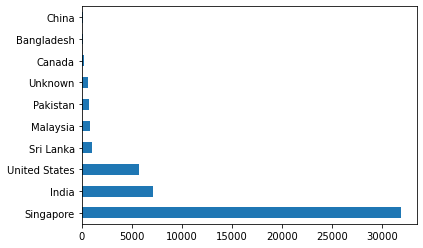

In [12]:
# Number of messages per country
country_value_counts = df['country'].value_counts() 

# Number of messages per country for the top 10 most active countries
top_10_country_value_counts = country_value_counts.head(10) 

# Plot a bar chart using pandas built-in plotting apis
top_10_country_value_counts.plot.barh() 

## Sentiment analysis
***
We will use Naive Bayes Classification, according to a trained model used for twitter sentiment analysis

In [13]:
# Download twitter data and sentiment analysis model
nltk.download('twitter_samples')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/j/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/j/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/j/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
# import the twitter data
from nltk.corpus import twitter_samples
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

In [15]:
# number of tweets
print('There are {} positive tweets.'.format(len(positive_tweets)))
print('There are {} negative tweets.'.format(len(negative_tweets)))
# Equilibred dataset

There are 5000 positive tweets.
There are 5000 negative tweets.


In [16]:
# Tokenize twitter dataset
pos_tweets = twitter_samples.tokenized('positive_tweets.json')
neg_tweets = twitter_samples.tokenized('negative_tweets.json')

In [17]:
# Cleaning tweets
pos_tw_cln =[]
neg_tw_cln =[]

for tw in pos_tweets:
    a=[]
    for tk in tw :
        tk = remove_punctuation(tk)
        tk = remove_html(tk)
        tk= remove_special_characters(tk)
        tk=remove_urls(tk)
        a.append(tk)
    pos_tw_cln.append(a)

for tw in neg_tweets:
    cleaned_tweet = []
    for token in tw:
        url_cleaned = remove_urls(token)
        html_cleaned = remove_html(url_cleaned)
        cleaned_tweet.append(html_cleaned)
    neg_tw_cln.append(cleaned_tweet)

len(neg_tw_cln)

5000

I will select the most common words in my corpus because I assume that these words are the best indicators if something is positive or negative. I will use a frequency distribution to select them.

In [20]:
#create a list of all the tweets
list_of_all_tweets = pos_tw_cln + neg_tw_cln

#turn my list of lists into a flat list of tokens
all_tweet_tokens = [token for sublist in list_of_all_tweets for token in sublist]

#check how many words that is
len(all_tweet_tokens)

130052

In [21]:
#create a frequency distribution of all the words.
all_tokens = nltk.FreqDist(token for token in all_tweet_tokens)

#inspect the result
print(len(all_tokens))
print(all_tokens.most_common(10))

#select the top 10,000 words to be our features
sentiment_features = [word for (word, freq) in all_tokens.most_common(10000)]

#check what this list looks like
sentiment_features[:5]

23651
[('', 12780), (':(', 4585), ('I', 2477), ('to', 2133), ('you', 2001), ('the', 1845), ('a', 1515), ('and', 1274), ('(', 1180), ('for', 1140)]


['', ':(', 'I', 'to', 'you']

Lets extract features !!

In [23]:
def document_features(document, sentiment_features):
    #make a set list of all the tokens in a message
    document_tokens = set(document)
    features = {}
    #for all my features, check if that feature is in my target message
    for token in sentiment_features:
        #make a dictionary for each message 
        features[token] = (token in document_tokens)
    return features

lets create a train and a test sets !!

In [24]:
# Import random library
import random

# Create positive and negative datasets from my lists of tokenized tweets
positive_tw = [(tweet, "Positive") for tweet in pos_tw_cln]
negative_tw = [(tweet, "Negative") for tweet in neg_tw_cln]

# Create the combined dataset
all_labeled_tweets = positive_tw + negative_tw

#initialize the random number so I get the same result every time
random.seed(42)
# Shuffle the order of the dataset NOTE that the random method applies in place
random.shuffle(all_labeled_tweets)

#create a list of (token, sentiment) pairs for all the features in the tweets
feature_set = [(document_features(d, sentiment_features),c) for (d,c) in all_labeled_tweets]
# Separate the dataset into the training and testing sets
train_set, test_set = feature_set[:7000], feature_set[7000:]

TIME TO TRAIIIIIIN !!!!

In [25]:
from nltk import classify
from nltk import NaiveBayesClassifier

# Instantiate a classifier and train on training data (this will take awhile)
classifier = nltk.NaiveBayesClassifier.train(train_set)

# Evaluate the model with classify() function
print("Accuracy is:", classify.accuracy(classifier, test_set))

#Show the 20 most informative features for prediction
print(classifier.show_most_informative_features(20))

Accuracy is: 0.993
Most Informative Features
                       D = True           Positi : Negati =    300.7 : 1.0
                    miss = True           Negati : Positi =     31.1 : 1.0
                     See = True           Positi : Negati =     29.3 : 1.0
                     sad = True           Negati : Positi =     23.6 : 1.0
                  THANKS = True           Negati : Positi =     22.6 : 1.0
                  FOLLOW = True           Negati : Positi =     21.9 : 1.0
                  Thanks = True           Positi : Negati =     21.1 : 1.0
                     x15 = True           Negati : Positi =     19.9 : 1.0
                 arrived = True           Positi : Negati =     17.6 : 1.0
                 welcome = True           Positi : Negati =     17.2 : 1.0
                         = False          Negati : Positi =     17.0 : 1.0
                   Thank = True           Positi : Negati =     17.0 : 1.0
                  Friday = True           Positi : Nega

Lets try the model on our 1st dataset

In [29]:
sample_message = str(df["Message_tokenized"][72])
print(sample_message)

# Print prediction of sentiment
print(classifier.classify(dict([token, True] for token in sample_message)))

['i', 'noe', 'la', 'u', 'wana', 'pei', 'bf', 'oso', 'rite', 'k', 'lor', 'other', 'days', 'den']
Negative


Let s work on all message

In [31]:
sentiments = []

for msg in df['Message_tokenized']:
    sentiments.append(str((classifier.classify(dict([token, True] for token in msg)))))

df['Sentiment'] = sentiments
df

,Unnamed: 0,id,Message,length,country,Date,Message_clean,Message_tokenized,Sentiment
0,0,10120,Bugis oso near wat...,21,Singapore,2003/4,bugis oso near wat,"[bugis, oso, near, wat]",Negative
1,1,10121,"Go until jurong point, crazy.. Available only ...",111,Singapore,2003/4,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...",Negative
2,2,10122,I dunno until when... Lets go learn pilates...,46,Singapore,2003/4,i dunno until when lets go learn pilates,"[i, dunno, until, when, lets, go, learn, pilates]",Negative
3,3,10123,Den only weekdays got special price... Haiz......,140,Singapore,2003/4,den only weekdays got special price haiz cant ...,"[den, only, weekdays, got, special, price, hai...",Negative
4,4,10124,Meet after lunch la...,22,Singapore,2003/4,meet after lunch la,"[meet, after, lunch, la]",Negative
...,...,...,...,...,...,...,...,...,...
48593,55828,45712,Come to me AFTER NOON,21,Serbia,2015/3,come to me after noon,"[come, to, me, after, noon]",Negative
48594,55830,45714,I LOVE YOU TOO,14,Serbia,2015/3,i love you too,"[i, love, you, too]",Positive
48595,55831,45715,C-YA,4,Serbia,2015/3,cya,[cya],Positive
48596,55833,45717,BE MY GUEST,11,Serbia,2015/3,be my guest,"[be, my, guest]",Negative


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

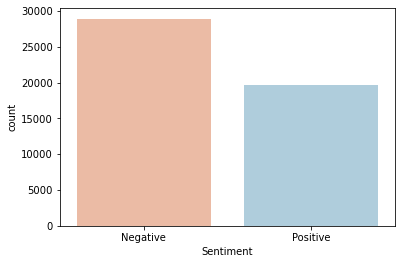

In [32]:
# Lets visualize our work
sns.countplot(x='Sentiment', data=df, palette='RdBu')

## Most Common topics 
***
For that we'll be using TF-IDF 